In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/405k [00:00<?, ?B/s]
100% 405k/405k [00:00<00:00, 58.8MB/s]
Archive:  voicegender.zip
  inflating: voice.csv               

--KernelPCA--
          1         2
0 -0.343686  0.019997
1  0.090257 -0.256895
2 -0.466581  0.376068
3 -0.325622  0.080054
4 -0.259029 -0.212842
-0.343686210991033 0.019996998033088884
0.09025712439751928 -0.25689454957861585


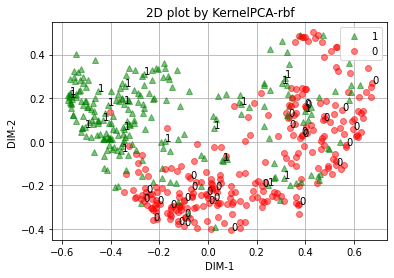


--KernelPCA--


/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


          1         2
0  0.134116 -0.023635
1 -0.033193  0.049738
2  0.256745 -0.172072
3  0.128883 -0.054700
4  0.126521  0.057545
0.13411585133071274 -0.023634759539073968
-0.03319271547633504 0.04973824383906403


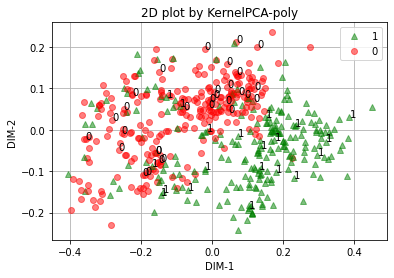


--PCA--
          1         2
0 -0.397186 -0.046173
1  0.091324  0.138075
2 -0.757524 -0.483544
3 -0.380566 -0.150361
4 -0.355195  0.150202
-0.39718631058489334 -0.046172603258584695
0.09132413992559618 0.13807533381321663


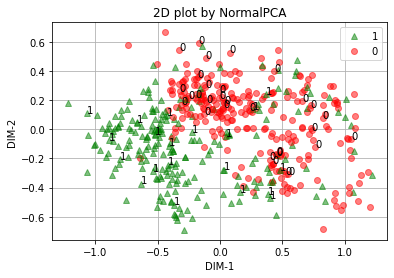

In [3]:
import numpy as np
import pandas as pd
# PCAとカーネルPCAを使用するためにインポート
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler
# 可視化用にインポート
import matplotlib.pyplot as plt
%matplotlib inline

# データの準備
def prepare():
    !kaggle datasets download -d primaryobjects/voicegender
    !unzip voicegender.zip
    df = pd.read_csv('voice.csv')
    df = df.sample(frac=1, random_state=0)
    vec = df.drop('label', axis=1).values
    # 正規化を行う
    ms = MinMaxScaler()
    vec = ms.fit_transform(vec)
    lbs = \
         df.loc[:,['label']].replace(\
         {'male':0, 'female':1}).values
    return vec, lbs

# カーネルPCA, PCAによる次元削減と可視化
def graph_Embedding(emb, features, lbs, fname):
    print('\n--{}--'.format(emb.__class__.__name__))
    df = pd.DataFrame(features, \
               columns=list(range(len(features[0]))))
    fspace = emb.fit_transform(df)
    fspace = fspace[:500]
    ndf = pd.DataFrame(fspace, columns=['1', '2'])
    print(ndf.head())
    n = 0
    labels = [0, 1]
    col = ['red', 'green']
    mks = ['o', '^']
    chk = [0] * 2
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i, (dim1,dim2,l) in enumerate(zip( \
        fspace[:,0], fspace[:,1], lbs[:,0])):
        if chk[l] == 0:
            print(dim1, dim2)
            ax.plot(dim1,dim2, alpha=0.5, c=col[l], \
            linestyle='None', marker=mks[l], label=labels[l])
        else:
            ax.plot(dim1,dim2,alpha=0.5, \
                     linestyle='None', c=col[l], \
                     marker=mks[l])
        chk[l] += 1
        n += 1
        if n % 10 == 0:
            ax.annotate(labels[l], xy=(dim1,dim2))
    ax.grid()
    ax.set_xlabel('DIM-1')
    ax.set_ylabel('DIM-2')
    ax.legend()
    ax.set_title('2D plot by {}'.format(fname))
    plt.savefig('voice2Dplot-{}.png'.format(fname),dpi=400)
    plt.show()

def main():
    features, lbs = prepare()
    types = ['KernelPCA-rbf', 
             'KernelPCA-poly', 'NormalPCA']
    for i, emb in enumerate([KernelPCA(n_components=2, \
                kernel='rbf', gamma=0.5, random_state=0), 
                KernelPCA(n_components=2, \
                kernel='poly', gamma=0.03, random_state=0), 
                PCA(n_components=2, random_state=0)]):
        graph_Embedding(emb, features, lbs, types[i])

if __name__ == '__main__':
    main()
